In [96]:
# Importing the libraries
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt

# Importing the dataset
fm_data = pd.read_csv('fm.csv')

In [2]:
# Missingness check
fm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159541 entries, 0 to 159540
Data columns (total 89 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   UID                  159541 non-null  int64 
 1   Name                 159541 non-null  object
 2   NationID             159541 non-null  int64 
 3   Born                 159541 non-null  object
 4   Age                  159541 non-null  int64 
 5   IntCaps              159541 non-null  int64 
 6   IntGoals             159541 non-null  int64 
 7   U21Caps              159541 non-null  int64 
 8   U21Goals             159541 non-null  int64 
 9   Height               159541 non-null  int64 
 10  Weight               159541 non-null  int64 
 11  AerialAbility        159541 non-null  int64 
 12  CommandOfArea        159541 non-null  int64 
 13  Communication        159541 non-null  int64 
 14  Eccentricity         159541 non-null  int64 
 15  Handling             159541 non-nu

In [97]:
# Cleaning response variable
fm_data.PositionsDesc = fm_data.PositionsDesc.str.split(' ').str[0]
fm_data = fm_data[(fm_data.PositionsDesc == 'D') | (fm_data.PositionsDesc == 'M') | (fm_data.PositionsDesc == 'S') | (fm_data.PositionsDesc == 'GK')]
fm_data.PositionsDesc[fm_data.PositionsDesc == 'D'] = 'DF' 
fm_data.PositionsDesc[fm_data.PositionsDesc == 'S']   = 'ST'
fm_data.PositionsDesc[fm_data.PositionsDesc == 'M'] = 'M' 

fm_data.PositionsDesc.value_counts()

/var/folders/h5/nb6dpjws5_31tkqzms_p18gr0000gn/T/ipykernel_25139/2516463700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/h5/nb6dpjws5_31tkqzms_p18gr0000gn/T/ipykernel_25139/2516463700.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


DF    37473
ST    21268
GK    17115
M     16877
Name: PositionsDesc, dtype: int64

In [ ]:
# Response variable check
(p9.ggplot(data = fm_data,
          mapping = p9.aes(x = 'PositionsDesc')) +
 p9.geom_bar())

In [98]:
# initial split
X = fm_data.iloc[:, np.r_[4, 9:73]].values
y = fm_data.iloc[:, 73].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [99]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

models = []
models.append(('LR', LogisticRegression(multi_class='multinomial')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/Users/joepopop/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/Users/joepopop/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/Users/joepopop/

LR: 0.975454 (0.000794)
LDA: 0.972488 (0.000710)


KeyboardInterrupt: 

In [100]:
from sklearn.linear_model import LogisticRegression
#fitting logistic regression to the training set
classifier = LogisticRegression(multi_class='multinomial')
classifier.fit(X_train, y_train)

/Users/joepopop/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(multi_class='multinomial')

In [101]:
#predict test set result
y_pred = classifier.predict(X_test)

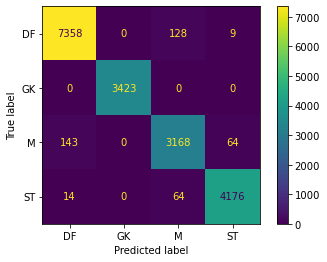

In [102]:
# Making the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9772469941230387

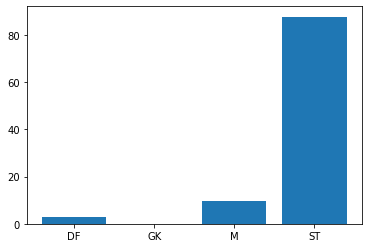

In [95]:
# try predicting and visualizing class probabilities
a_list = classifier.predict_proba([list(range(1, 66))]).tolist()[0]
multiplied_list = [round(element * 100, 1) for element in a_list]
plt.bar(['DF', 'GK', 'M', 'ST'], multiplied_list)
plt.show()

In [104]:
# save model with pickle
import pickle
pickle.dump(classifier, open('model.pkl','wb')) 